# Data Scaling

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# federal listing status
print('Test Data')
print('Endangered: ' + str((y_test == 'Endangered').sum() / y_test.count()))
print('Not Listed: ' + str((y_test == 'Not Listed').sum() / y_test.count()))
print('Threatened: ' + str((y_test == 'Threatened').sum() / y_test.count()))

Test Data
Endangered: 0.16695059625212946
Not Listed: 0.7597955706984668
Threatened: 0.07325383304940375


### Class Imbalance

In [28]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np

In [29]:
# DummyClassifier to predict majority class
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred_train = dummy.predict(X_train)
dummy_pred_test = dummy.predict(X_test)
dummy

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [30]:
# checking training metrics
print('Train Accuracy score: ', accuracy_score(y_train, dummy_pred_train))
print('Train F1 score: ', f1_score(y_train, dummy_pred_train, average='weighted'))

# checking test metrics
print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred_test))
print('Test F1 score: ', f1_score(y_test, dummy_pred_test, average='weighted'))

Train Accuracy score:  0.7728192565768452
Train F1 score:  0.6737851037214285
Test Accuracy score:  0.7597955706984668
Test F1 score:  0.656086785152984


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
log_reg_clf = LogisticRegression(C=1e12, solver='liblinear')
log_reg_clf.fit(X_train, y_train)
y_pred_train = log_reg_clf.predict(X_train)
y_pred_test = log_reg_clf.predict(X_test)
log_reg_clf

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [32]:
# checking training metrics
print('Train Accuracy score: ', accuracy_score(y_train, y_pred_train))
print('Train F1 score: ', f1_score(y_train, y_pred_train, average='weighted'))

# checking test metrics
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))
print('Test F1 score: ', f1_score(y_test, y_pred_test, average='weighted'))

Train Accuracy score:  0.810096921929918
Train F1 score:  0.76583235304541
Test Accuracy score:  0.8036626916524702
Test F1 score:  0.7568596382773838


9389
Endangered: 0.16050697624880178
Not Listed: 0.7728192565768452
Threatened: 0.06667376717435297


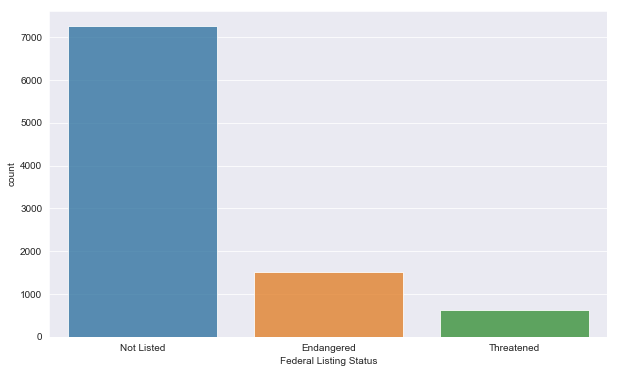

In [33]:
# federal listing status
print(y_train.count())
print('Endangered: ' + str((y_train == 'Endangered').sum() / y_train.count()))
print('Not Listed: ' + str((y_train == 'Not Listed').sum() / y_train.count()))
print('Threatened: ' + str((y_train == 'Threatened').sum() / y_train.count()))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_train, alpha=0.8)

In [34]:
keys = list(y_train.unique())
values = np.ones((3), dtype=int) * (y_train == 'Not Listed').sum()
sample_ratio = dict(zip(keys, values))
sample_ratio

{'Not Listed': 7256, 'Endangered': 7256, 'Threatened': 7256}

21768
Endangered: 0.3333333333333333
Not Listed: 0.3333333333333333
Threatened: 0.3333333333333333


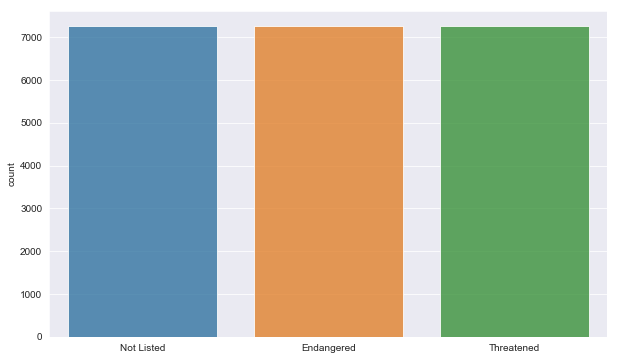

In [35]:
species['Federal Listing Status'].unique()

sm = SMOTE(ratio=sample_ratio)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

# federal listing status
print(len(y_train_sm))
print('Endangered: ' + str((y_train_sm == 'Endangered').sum() / len(y_train_sm)))
print('Not Listed: ' + str((y_train_sm == 'Not Listed').sum() / len(y_train_sm)))
print('Threatened: ' + str((y_train_sm == 'Threatened').sum() / len(y_train_sm)))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_train_sm, alpha=0.8)

In [36]:
# DummyClassifier to predict majority class
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred_train_sm = dummy.predict(X_train_sm)
dummy_pred_test = dummy.predict(X_test)
dummy

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [37]:
# checking training metrics
print('Train Accuracy score: ', accuracy_score(y_train_sm, dummy_pred_train_sm))
print('Train F1 score: ', f1_score(y_train_sm, dummy_pred_train_sm, average='weighted'))

# checking test metrics
print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred_test))
print('Test F1 score: ', f1_score(y_test, dummy_pred_test, average='weighted'))

Train Accuracy score:  0.3333333333333333
Train F1 score:  0.16666666666666666
Test Accuracy score:  0.7597955706984668
Test F1 score:  0.656086785152984


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
log_reg_clf = LogisticRegression(C=1e12, solver='liblinear')
log_reg_clf.fit(X_train_sm, y_train_sm)
y_pred_train_sm = log_reg_clf.predict(X_train_sm)
y_pred_test = log_reg_clf.predict(X_test)
log_reg_clf

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [39]:
# checking training metrics
print('Train Accuracy score: ', accuracy_score(y_train_sm, y_pred_train_sm))
print('Train F1 score: ', f1_score(y_train_sm, y_pred_train_sm, average='weighted'))

# checking test metrics
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))
print('Test F1 score: ', f1_score(y_test, y_pred_test, average='weighted'))

Train Accuracy score:  0.6538956266078647
Train F1 score:  0.6461623785905141
Test Accuracy score:  0.7555366269165247
Test F1 score:  0.7513458843942121


### Model Fitting

### Model Evaluation